In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
class qvoter():
    '''
    Class to generate q-voter model with given parameters.
    '''
    def __init__(self, N, graphType, q, p, m = 5, k = 5, pws = 0.1, eps = 0.1):
        '''
        Initializes the graph to generate q-voter model.
        
        Parameters:
            N - number of spinsons (agents)
            graphType - type of graph, it can be chosen from: completeGraph, barabasiAlbert, wattsStrogatz
            q - number of neighbors that will influence a chosen spinson
            p - probability of independence in voting
            m - number of edges that are preferentially attached to existing nodes with high degree. The default is 5
            k - number of neighbors that each node is connected to in ring topology. The default is 5.
            pws -  probability of rewiring each edge used in watts strogatz graph. The default is 0.1.
            eps - probability of flipping when q-panel is not aunanimous. The default is 0.1.
        '''
        
        if graphType == 'completeGraph':
            self.G = nx.complete_graph(N)
            
        elif graphType == 'barabasiAlbert':
            self.G = nx.barabasi_albert_graph(N, m)
            
        elif graphType == 'wattsStrogatz':
            self.G = nx.watts_strogatz_graph(N, k, pws)
            
        self.q = q
        self.p = p
        self.eps = eps
        
    def qVoterSimulation(self, MCSteps):
        '''
        Simulates q-voter model.
        
        Parameters:
            MCSteps - Monte Carlo steps in a simulation
        '''
        
        nodes = list(self.G.nodes())
        #opinions = list(1 for i in range(len(nodes)))
        
        colorMap = {'1': 'green', '-1': 'red'}
        
        for node in nodes:
            self.G.nodes[node]['state'] = '1'
        
        for _ in range(MCSteps):    
            startSpinson = random.choice(nodes)
            #startSpinsonIndex = nodes.index(startSpinson)
            neighbors = list(self.G.neighbors(startSpinson))
            isIndependent = False
            
            if np.random.rand() < self.p:
                isIndependent = True

            if isIndependent == True:
                if np.random.rand() < 0.5:
                    self.G.nodes[startSpinson]['state'] = '-1'
                    #opinions[startSpinsonIndex] = -1               
            else:
                qNeighbors = random.sample(neighbors, self.q)
                #qNeighborsInidices = [nodes.index(i) for i in qNeighbors]
                sameOpinion = 0
                #for i in range(1, len(qNeighborsIndices)):
                for i in range(1, len(qNeighbors)):
                    #if opinions[i] != opinions[i - 1]:
                    if self.G.nodes[qNeighbors[i]]['state'] != self.G.nodes[qNeighbors[i - 1]]['state']:
                        sameOpinion += 1

                if sameOpinion == 0:
                    #opinions[startSpinsonIndex] = opinions[qNeighborsIndices[0]]
                    self.G.nodes[startSpinson]['state'] = self.G.nodes[qNeighbors[0]]['state']
                else:
                    if np.random.rand() < self.eps:
                        if self.G.nodes[startSpinson]['state'] == '1':
                            self.G.nodes[startSpinson]['state'] = '-1'
                        else:
                            self.G.nodes[startSpinson]['state'] = '1'
                            
        states = nx.get_node_attributes(self.G, 'state')
            
        plt.figure(figsize=(6, 6))
        nx.draw(self.G, node_color = [colorMap[states[node]] for node in self.G.nodes],
                node_size = 100, with_labels = False)

In [75]:
G = qvoter(10, 'completeGraph', 3, 0.3)

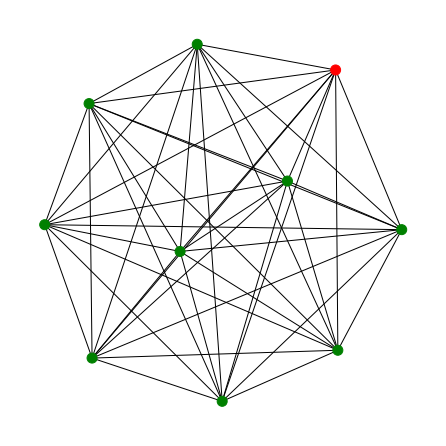

In [77]:
G.qVoterSimulation(20)